## Import CSV's to create Pandas Dataframes

In [3]:
import csv
import requests
import pandas as pd
from io import StringIO
import zipfile
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [4]:
url = 'https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv'
response = requests.get(url)
df_airlines = pd.read_csv(StringIO(response.text))

In [5]:
df_airlines.to_csv('airline_reviews.csv')

In [6]:
url1 = 'https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airport.csv'
response1 = requests.get(url1)
df_airports = pd.read_csv(StringIO(response1.text))

In [7]:
df_airports.to_csv('airport_reviews.csv')

### Take a look at CSV contents

In [7]:
flight_df.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'DEP_TIME', 'DEP_DELAY',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'Unnamed: 34'],
      dtype='object')

In [6]:
df_airlines.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')

In [7]:
df_airports.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended'],
      dtype='object')

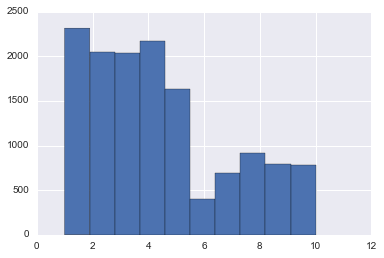

In [9]:
df_airports['overall_rating'].dropna().hist()

In [1]:
#dict(Counter(df_airlines['author_country']))

In [14]:
flight_df.groupby(['UNIQUE_CARRIER'])['CANCELLED'].sum()

UNIQUE_CARRIER
AA    2720.0
AS     139.0
B6     897.0
DL     974.0
EV    1427.0
F9      77.0
HA       4.0
NK     308.0
OO     984.0
UA    1336.0
VX     159.0
WN    2640.0
Name: CANCELLED, dtype: float64

In [111]:
flight_df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 34,FL_YR
0,2016-01-01,AA,19805,AA,43,11433,1143302,31295,DTW,"Detroit, MI",...,32.0,0.0,NaN,0.0,197.0,986.0,26.0,0.0,NaN,2016
1,2016-01-01,AA,19805,AA,44,14747,1474703,30559,SEA,"Seattle, WA",...,8.0,0.0,NaN,0.0,329.0,2422.0,NaN,NaN,NaN,2016
2,2016-01-01,AA,19805,AA,45,12478,1247803,31703,JFK,"New York, NY",...,0.0,0.0,NaN,0.0,366.0,2422.0,NaN,NaN,NaN,2016
3,2016-01-01,AA,19805,AA,46,14831,1483103,32457,SJC,"San Jose, CA",...,0.0,0.0,NaN,0.0,246.0,1829.0,NaN,NaN,NaN,2016
4,2016-01-01,AA,19805,AA,47,13930,1393004,30977,ORD,"Chicago, IL",...,0.0,0.0,NaN,0.0,261.0,1829.0,NaN,NaN,NaN,2016


In [105]:
flight_df['FL_YR'] = flight_df['FL_DATE'].apply(lambda x: x[:4])

In [38]:
flight_df['CANCELLED'].value_counts()

0.0    434162
1.0     11665
Name: CANCELLED, dtype: int64

In [20]:
flight_df['origin_dest'] = list(zip(flight_df.UNIQUE_CARRIER, flight_df.ORIGIN_CITY_NAME, flight_df.DEST_CITY_NAME))

In [27]:
flight_df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 34,origin_dest
0,2016-01-01,AA,19805,AA,43,11433,1143302,31295,DTW,"Detroit, MI",...,32.0,0.0,NaN,0.0,197.0,986.0,26.0,0.0,NaN,"(AA, Detroit, MI, Dallas/Fort Worth, TX)"
1,2016-01-01,AA,19805,AA,44,14747,1474703,30559,SEA,"Seattle, WA",...,8.0,0.0,NaN,0.0,329.0,2422.0,NaN,NaN,NaN,"(AA, Seattle, WA, New York, NY)"
2,2016-01-01,AA,19805,AA,45,12478,1247803,31703,JFK,"New York, NY",...,0.0,0.0,NaN,0.0,366.0,2422.0,NaN,NaN,NaN,"(AA, New York, NY, Seattle, WA)"
3,2016-01-01,AA,19805,AA,46,14831,1483103,32457,SJC,"San Jose, CA",...,0.0,0.0,NaN,0.0,246.0,1829.0,NaN,NaN,NaN,"(AA, San Jose, CA, Chicago, IL)"
4,2016-01-01,AA,19805,AA,47,13930,1393004,30977,ORD,"Chicago, IL",...,0.0,0.0,NaN,0.0,261.0,1829.0,NaN,NaN,NaN,"(AA, Chicago, IL, San Jose, CA)"


In [31]:
df_airlines.iloc[0, 6]

"Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min."

In [32]:
len(df_airlines)

41396

In [33]:
len(df_airports)

17721

In [45]:
len(flight_df)

445827